<a href="https://colab.research.google.com/github/sumitha9020/Elevatelabs_Tasks/blob/main/Task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


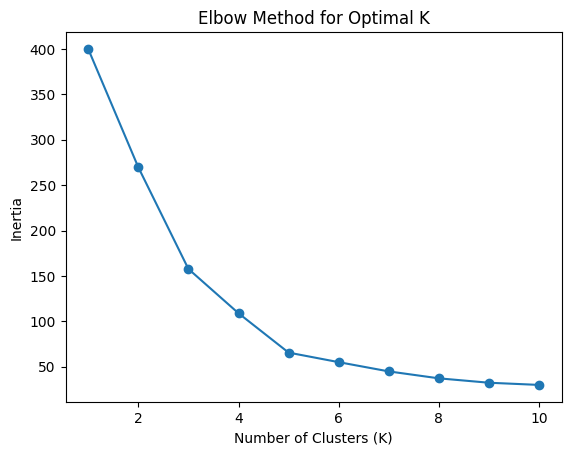

Silhouette Score: 0.5546571631111091


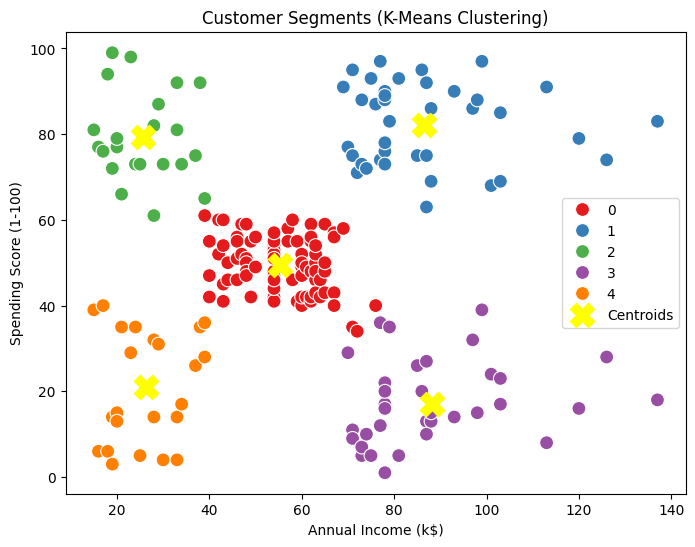

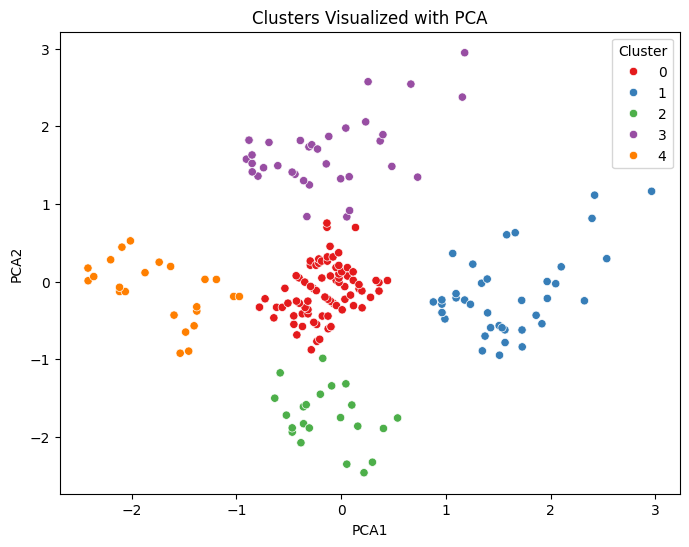

In [1]:
# Task 8: K-Means Clustering (Customer Segmentation Example)

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 1. Load dataset (Mall Customer Segmentation dataset from Kaggle)
df = pd.read_csv("/content/Mall_Customers.csv")
print(df.head())

# Select features (Annual Income and Spending Score for easy visualization)
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# 3. Fit KMeans with optimal K (assume K=5 from Elbow)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# 4. Evaluate clustering using Silhouette Score
score = silhouette_score(X_scaled, df["Cluster"])
print("Silhouette Score:", score)

# 5. Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="Set1",
    data=df,
    s=100
)
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 0],
    scaler.inverse_transform(kmeans.cluster_centers_)[:, 1],
    s=300,
    c="yellow",
    marker="X",
    label="Centroids"
)
plt.title("Customer Segments (K-Means Clustering)")
plt.legend()
plt.show()

# 6. Optional: PCA for high-dimensional data visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="Set1", data=df)
plt.title("Clusters Visualized with PCA")
plt.show()
